In [73]:
import pandas as pd
import scipy.stats as stats
from scipy.special import comb
import math
import matplotlib.pyplot as plt
import stemgraphic
import statsmodels.api as sm
from scipy.optimize import minimize_scalar

Question 1.

In [26]:

data = [127, 125, 131, 124, 129, 121, 142, 151, 160, 125, 124, 123, 120, 119, 128, 133, 137, 124, 142, 123, 121, 136, 140, 137, 125, 124, 128, 129, 130, 122, 118, 131, 125, 133, 141, 125, 140, 131, 129, 126]
df = pd.DataFrame({'time': data})


1a. Median of the sample

In [20]:
df.median()

time    128.0
dtype: float64

1b. The median is calculated by the average of the 20th and 21st data points, which are both 128. Since the largest observation is 160, which is greater than 128, we can increase the max value without bounds. 

1c. Mean and Standard deviation

In [21]:
print(df.mean())
print(df.std())

time    129.975
dtype: float64
time    8.914084
dtype: float64


1d. Histogram

Text(0.5, 1.0, 'Histogram of Time to Failure')

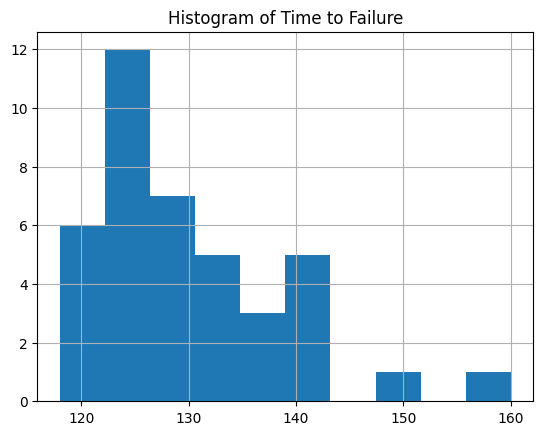

In [36]:
df.hist()
plt.title('Histogram of Time to Failure')

1e. Stem Plot

(<Figure size 750x350 with 1 Axes>, <Axes: >)

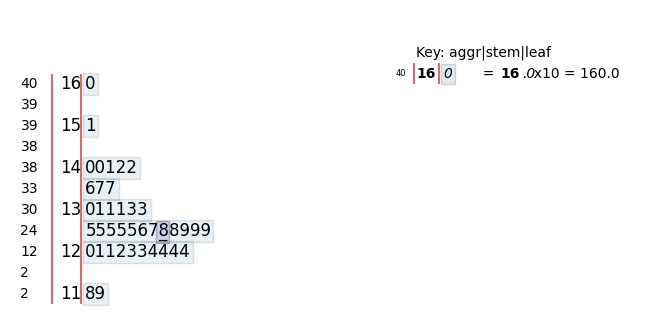

In [23]:
stemgraphic.stem_graphic(df['time'])

1f. 25th and 75th percentiles.

In [24]:
q25 = df['time'].quantile(0.25)
q75 = df['time'].quantile(0.75)
print("25th percentile:", q25)
print("75th percentile:", q75)

25th percentile: 124.0
75th percentile: 133.75


1g. Boxplot

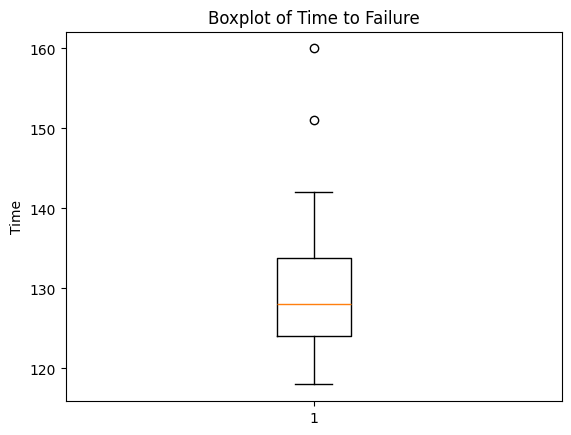

In [25]:
plt.boxplot(df['time'])
plt.title('Boxplot of Time to Failure')
plt.ylabel('Time')
plt.show()

1h. The distribution of time to failures is fairly symmetrical with a median of 129.975 and a standard deviation of around 9. The inner quartile range is 9.75. The boxplot shows a slight right tail and an outlier of 160. The mean is slightly larger than the median, which gives more indication to a slight right skew, though the distribution overall is mostly normal.

1i. Q-Q Plot

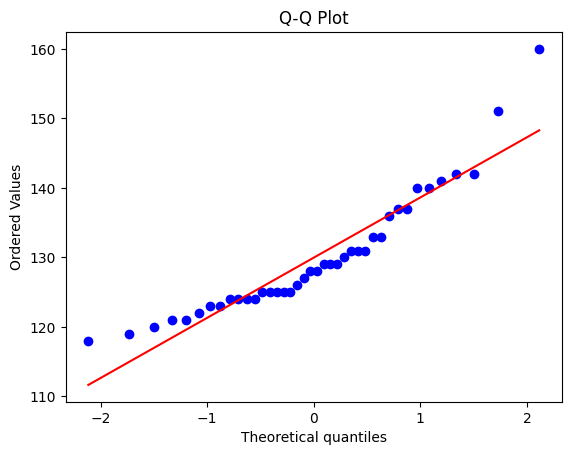

In [43]:
stats.probplot(df['time'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

Based on the Q-Q plot, it is safe to say that the distribution is normal, as it follows the 45 degree line very well.

Question 2. Patients arriving at an Outpatient clinic are routinely screened for high blood pressure. Assume this condition occurs in 15% of the population 

2a. What is the probability that the third patient today is the first to have high blood pressure

In [50]:
p = .15
print(f"P(third patient is first success): {stats.geom.pmf(3, p):.4f}")

P(third patient is first success): 0.1084


2b. What is the average number of patients that must be seen to find the first patient with high blood pressure?

In [49]:
avg_trials = 1/p
print(avg_trials)

6.666666666666667


2c. If the clinic typically sees 50 patients each day, what is the probability of finding exactly 10 patients with high blood pressure?

In [57]:
probability = stats.binom.pmf(10, 50, p)
print(f"Probability: {probability:.3f}")

Probability: 0.089


Question 3. An electronic component for a medical X-ray unit is produced in lots of size N = 25. An acceptance testing procedure is used by the purchaser to protect against lots that contain too many nonconforming components. The procedure consists of selecting five components at random from the lot (without replacement) and testing them. If none of the components is nonconforming, the lot is accepted. 

3a. If the lot contains two nonconforming components, what is the probability of lot acceptance?

In [ ]:
N = 25
K = 2
n = 5

P0 = comb(N-K, n) / comb(N, n)
print(f" Exact: P(accept) = {P0:.5f}")

 Exact P(accept) = 0.63333


3b. Calculate the desired probability in (a) using the binomial approximation. Is this approximation satisfactory? Why or why not?

In [ ]:
p = K/N
P_bin = (1-p)**n
print(f"Binomial approx:  P(accept) = {P_bin:.5f}")

Binomial approx P(accept) = 0.65908


The binomial approximation overestimates the probability because sampling without replacement increases the chances of a non-conforming component after one conforming component is removed. Because K is relatively small, this has a moderate effect. Because the sample size (n=5) is a large portion of the total population (N=25), we should use the hypergeometric exact method.

3c. Suppose the lot size was N = 150. Would the binomial approximation be satisfactory in this case?

In [67]:
N2 = 150
K2 = 2
n2 = 5

P_exact2 = comb(N2-K2, n2) / comb(N2, n2)
print(f"Exact P(accept) for N=150: {P_exact2:.5f}")

p2 = K2/N2
P_bin2 = (1-p2)**n2
print(f"Binomial approx for N=150: {P_bin2:.5f}")
print(f"Difference: {abs(P_exact2 - P_bin2):.6f}")

Exact P(accept) for N=150: 0.93423
Binomial approx for N=150: 0.93509
Difference: 0.000859


Because the proportion of n/N is much smaller than before, the difference is minimal, and therefore it is satisfactory.

3d. Suppose that the purchaser will reject the lot (of N = 25) with the decision rule of finding one or more nonconforming components in a sample of size n, and wants the lot to be rejected with probability at least 0.95 if the lot contains five or more nonconforming components. How large should the sample size be?

In [68]:
# this is a brute force approach, there is likely a more elegant way to do this
N = 25
for n in range(1, N+1):
    P_accept = comb(20, n) / comb(25, n)
    if P_accept <= 0.05:
        print(f"n = {n}, P(accept) = {P_accept:.5f}")
        break

n = 11, P(accept) = 0.03768


Question 4. Surface-finish defects in a small electric appliance occur at random with a mean rate of 0.1 defects per unit. Find the probability that a randomly selected unit will contain at least one surface-finish defect.

In [64]:
prob_zero = math.exp(-.1)
prob_at_least_one = 1-prob_zero
print(f"Probability of at least one defect:  {prob_at_least_one:.4f}")

Probability of at least one defect:  0.0952


The probability that a randomly selected unit contains at least one defect is around 9.52%

Question 5. A lightbulb has a normally distributed light output with mean 5000 end foot-candles and standard deviation of 50 end foot-candles. Find a lower specification limit such that only 0.5% of the bulbs will not exceed this limit.

In [66]:
L = stats.norm.ppf(.005, loc=5000, scale=50)
print(f"Lower limit: {L:.2f} foot-candles")

Lower limit: 4871.21 foot-candles


Question 6. The time to failure of a product is well described by the following probability distribution: f(x) = 0.1e—0.1x, x ≥ 0.
6a. If time is measured in hours, what is the probability that a unit fails before 48 hours?
6b. What is the probability that a unit fails after 5 hours?


In [69]:
prob_before_48 = 1 - math.exp(-.1 * 48)
prob_after_5 = math.exp(-.1 * 5)
print(f"Probability of failure before 48 hours: {prob_before_48:.4f}")
print(f"Probability of failure after 5 hours: {prob_after_5:.4f}")

Probability of failure before 48 hours: 0.9918
Probability of failure after 5 hours: 0.6065


Question 7. The output of a manufacturing process is normally distributed with mean 100 and standard deviation 2. Suppose that the lower specification limit is 97 and the upper specification limit is at 102 (values between which a manufactured unit is considered acceptable). 

7a. What proportion of the process output is within the specifications?

In [72]:
mu = 100
sigma = 2
lower = 97
upper = 102

z_lower = (lower - mu) / sigma
z_upper = (upper - mu) / sigma


prob_below_limit = stats.norm.cdf(z_lower)
prob_above_limit = 1 - stats.norm.cdf(z_upper)
prob_within_specs = stats.norm.cdf(z_upper) - stats.norm.cdf(z_lower)

print(f"Proportion below lower limit: {prob_below_limit:.3f}")
print(f"Proportion above upper limit: {prob_above_limit:.3f}")
print(f"Proportion within specification: {prob_within_specs:.3f}")



Proportion below lower limit: 0.067
Proportion above upper limit: 0.159
Proportion within specification: 0.775


7b. Now suppose that units that are above the upper specification must be scrapped at a cost of $5 per unit, while units that are below the lower specification limit can be reworked at a cost of $1 per unit. If the process mean can be adjusted relatively easily, what value would you recommend adjusting the mean to in order to minimize the total costs that are being incurred due to scrap and rework?

In [74]:
def expected_cost(mu):
    prob_below = stats.norm.cdf((lower - mu) / sigma)
    prob_above = 1 - stats.norm.cdf((upper - mu) / sigma)
    return 1 * prob_below + 5 * prob_above

result = minimize_scalar(expected_cost, bounds=(95, 102), method='bounded')

optimal_mu = result.x
min_cost = result.fun

print(f"Optimal mean (mu): {optimal_mu:.3f}")
print(f"Minimum expected cost per unit: ${min_cost:.4f}")


Optimal mean (mu): 98.212
Minimum expected cost per unit: $0.4178


Question 8. Laura loves going to Vegas and playing Roulette. Each time she plays, she bets on the first column, which has a 12/38 = 31.58% chance of winning. On her next trip, she will play Roulette with this bet 50 times. Using the appropriate approximation, approximate the probability that she wins at least 12 times.

In [75]:
n = 50
p = 12/38

mean = n*p
std_dev = math.sqrt(mean*(1-p))

x = 11.5 #due to continuity correction
z=(x-mean)/std_dev

prob = 1-stats.norm.cdf(z)

print(f"Mean: {mean:.4f}")
print(f"Standard deviation: {std_dev:.4f}")
print(f"Z-score: {z:.4f}")
print(f"Probability of winning at least 12 times: {prob:.4f}")
print(f"Probability as percentage: {prob*100:.2f}%")

Mean: 15.7895
Standard deviation: 3.2868
Z-score: -1.3050
Probability of winning at least 12 times: 0.9041
Probability as percentage: 90.41%
